In [1]:
#for accuracy deep learning came into picture (unstructured data)
#tensorflow is library which have in built unlike pytorch. we use tensorflow or
#machine add weights and bais(hyper parameters) to the input which are going to the perceptron(1 neuron).this is linear model.
#we are going to introduce non-linearity(segregation) with the activation function.without activation fn the model is ml only
#preception db:-can't handle multiple task.to overcome this mlp came(has ip,hidden,op layer where preceptrons are connected)
#in op lay,if you are usin 2 class then sigmoid.if there is 3 or more classes then go with softmax in op layer.
#in hidden layer,we use relu or leky relu by default.
#from ip to op it is feed forward propogation.from op to ip,backward propogation(there optimizers(adam) comes where we update weight and bais))
#loss fn is the gap bw the actual and predicted value
#here directly the dataset(train and test) from the github through url.so to upload dataset,we alwalys use the github link.as it stores more without crash.
import os #whenever u want to add path or file,call os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('.zip'):
  urllib.request.urlretrieve("https://github.com/Gurupatil0003/Dog-and-Cat-Dataset/archive/refs/heads/main.zip", "Cat Dog Data Set.zip")

zip_filename = "Cat_Dog_Dataset.zip"
with zipfile.ZipFile("Cat Dog Data Set.zip","r") as zip_ref:
    zip_ref.extractall(".") #to unzip the data

In [2]:
#call tensorflow.
import tensorflow as tf
from tensorflow.keras.models import Sequential #calling model and the connection is one by one(sequential)
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#read the images and store it in a variable
train_path="/content/Dog-and-Cat-Dataset-main/data/train"
test_path="/content/Dog-and-Cat-Dataset-main/data/test"

In [4]:
#split the batches and making the dataset to divide
IMG_SIZE=64
BATCH_SIZE=32

In [5]:
#rescale the image
Train_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, #given data
    target_size=(IMG_SIZE,IMG_SIZE), #64,64
    batch_size=BATCH_SIZE, #32
    class_mode='binary'
)


Found 19989 images belonging to 2 classes.


In [6]:
#rescale the image for test data by calling ImageDataGenerator
Test_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, #given data
    target_size=(IMG_SIZE,IMG_SIZE), #64,64
    batch_size=BATCH_SIZE, #32
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [7]:
#rescale and making batches is data cleaning in ann
#call SEquential
model=Sequential([
    Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)), #calling input layer and here 3 is rgb
    Dense(300,activation="relu"),#300 neurons in hidden layer and dense is the connection
    Dense(1,activation="sigmoid") #1 output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#before sending to the training process,we have to fit the model in supervised learning but here
#we have make model ready,there is a compile u have to call
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])

In [9]:
model.fit(Train_data,epochs=3,validation_data=Test_data) #epochs means a cycle(forward and backward)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.5343 - loss: 1.3680 - val_accuracy: 0.6012 - val_loss: 0.6609
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.5936 - loss: 0.6690 - val_accuracy: 0.6104 - val_loss: 0.6521
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.6149 - loss: 0.6587 - val_accuracy: 0.5976 - val_loss: 0.6644


Saving cat.10004.jpg to cat.10004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


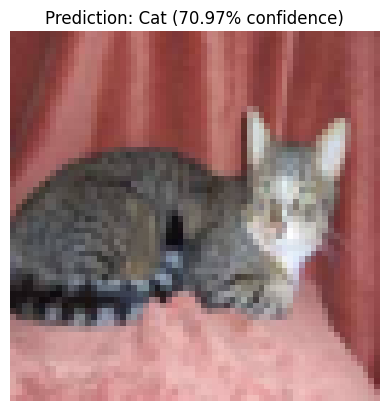

In [10]:
 #model is done,now we need to predict.we need a ui interface to check by django or flask. but here just a reference
 # Upload and Predict

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    #image convert into pixel by 255.0 here
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Show Result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2%} confidence)")
    plt.show()
